In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset_cleaned.csv')   

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
# drop day month and year

df.drop(['day','month','year'],axis = 1,inplace = True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
# Encoding
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [9]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [10]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [11]:
# Independent and dependent features

X = df.drop('FWI',axis =1)
y = df['FWI']


In [12]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [13]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [14]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)

In [15]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [16]:
## Feature Selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


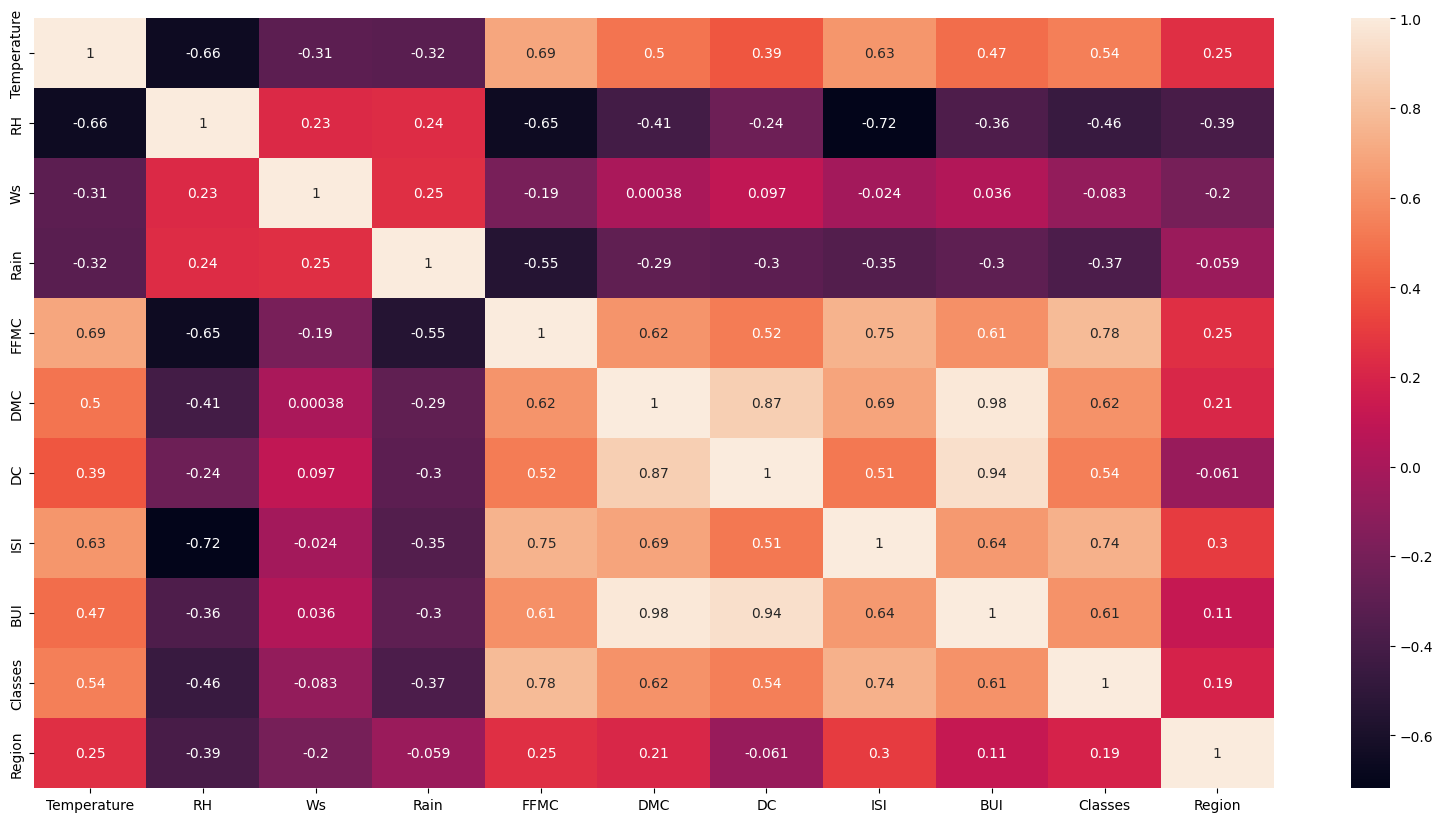

In [17]:
## check for multicollinearity
plt.figure(figsize=(20,10))
corr = X_train.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [18]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # we are interested in absolute values
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [19]:
## threshold -- it is actually done by domain expert
corr_feature = correlation(X_train,0.85)

In [20]:
## drop the correlation features which are above 0.85
X_train.drop(corr_feature,axis=1,inplace=True)

In [21]:
X_test.drop(corr_feature,axis=1,inplace=True)

In [22]:
X_train.shape,X_test.shape

((182, 9), (61, 9))

In [23]:
## feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [24]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Box Plot To Understand Effect of Standard Scalar

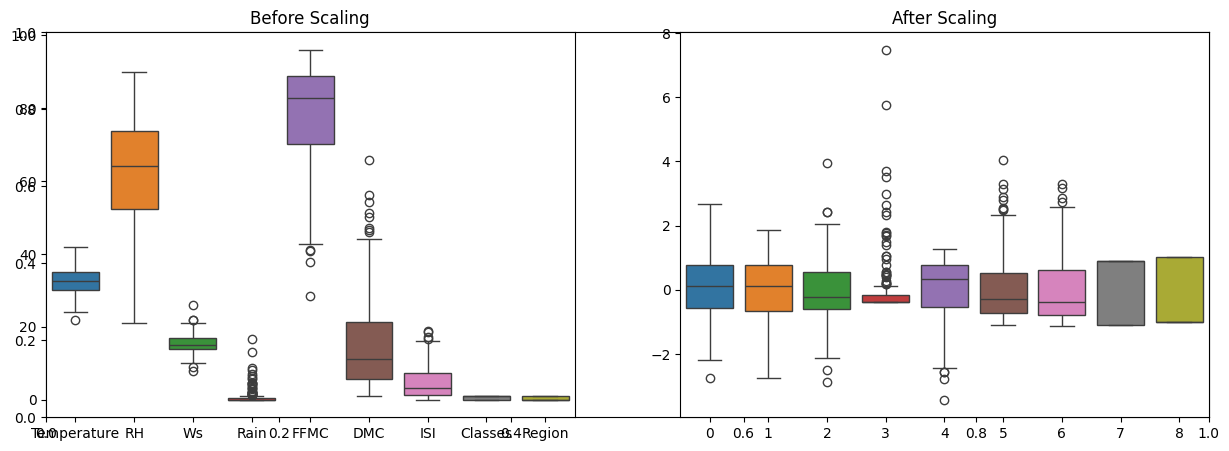

In [25]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('After Scaling')
plt.show()

## Linear Regression Model

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
linreg = LinearRegression()

In [27]:
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 0.5468236465249986


In [28]:
score = r2_score(y_test,y_pred)
print('R2 Score:',score)

R2 Score: 0.9847657384266951


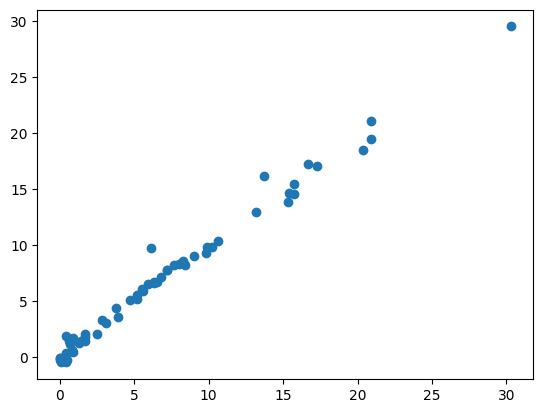

In [29]:
plt.scatter(y_test,y_pred)
plt.show()

## Lasso Regression

Mean Absolute Error: 1.133175994914409
R2 Score: 0.9492020263112388


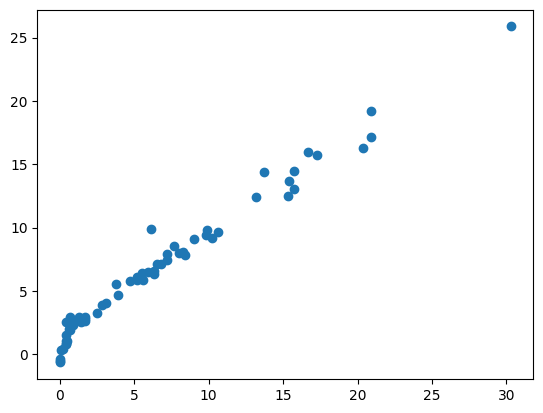

In [30]:
## let's apply the Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
score = r2_score(y_test,y_pred)
print('R2 Score:',score)
plt.scatter(y_test,y_pred)
plt.show()

## Ridge Regression Model

Mean Absolute Error: 0.5642305340105692
R2 Score: 0.9842993364555513


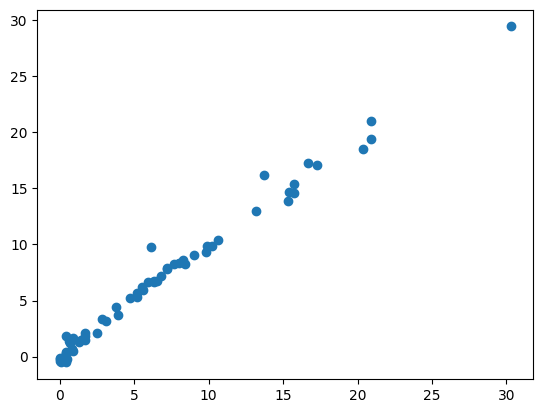

In [31]:
## let's apply the Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
score = r2_score(y_test,y_pred)
print('R2 Score:',score)
plt.scatter(y_test,y_pred)
plt.show()

## ElasticNet Regression

Mean Absolute Error: 1.8822353634896005
R2 Score: 0.8753460589519703


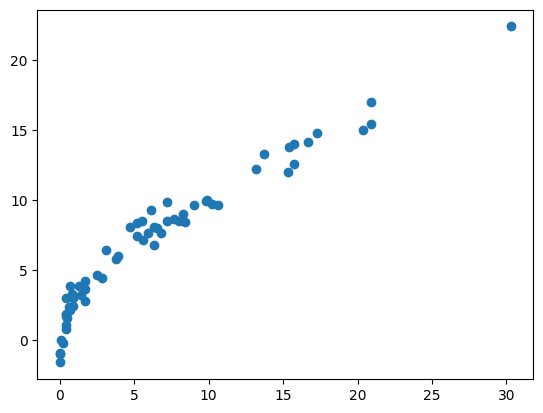

In [32]:
## let's apply the Ridge Regression
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred = elastic.predict(X_test_scaled)
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
score = r2_score(y_test,y_pred)
print('R2 Score:',score)
plt.scatter(y_test,y_pred)
plt.show()

## Cross Validation Lasso

In [33]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv = 5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [34]:
lassocv.predict(X_test_scaled)

array([ 8.17490595,  7.68312478, -0.25676525,  4.72643402,  6.78715772,
        1.77624325,  2.23148094,  7.64057821,  1.99176323,  3.39941035,
        0.62808928,  9.95945488,  9.36168319, 16.98503659, 18.28488762,
        1.61644108,  1.62751276, -0.6415713 ,  7.28510526,  3.10926518,
        1.95541903,  0.18069335,  6.47563129,  0.14318503, 20.99597009,
        5.11755206,  5.86208849,  9.75914403, -0.77037467,  9.91838577,
        6.72277075, -0.31776007, 10.31109643, 14.4365551 ,  1.71022677,
        0.83439752,  2.03414915,  5.97488529, -0.6263644 , -0.56200288,
        6.47253729,  2.07971408,  8.46741557, -0.8464481 , 15.40443856,
        8.32941189,  8.48782486,  1.44030355, 13.02752812,  1.20911545,
       29.08623849,  5.49737681, 17.15937199, 19.28890096, 13.71102991,
       16.05355549,  0.99056448,  9.0873725 ,  3.84455993, 14.43991192,
        5.23034139])

Mean Absolute Error: 0.619970115826343
R2 Score: 0.9820946715928275


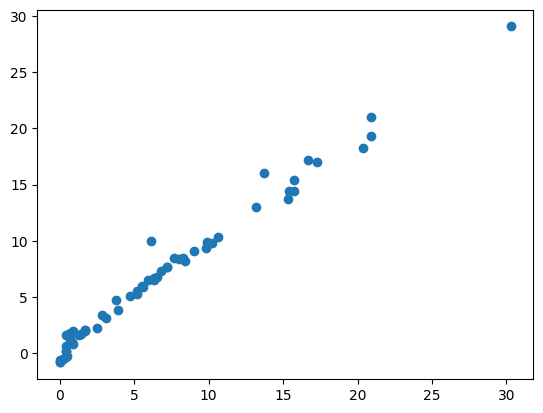

In [35]:
y_pred = lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
score = r2_score(y_test,y_pred)
print('R2 Score:',score)
plt.show()

## Cross Validation Ridge

Mean Absolute Error: 0.5642305340105692
R2 Score: 0.9842993364555513


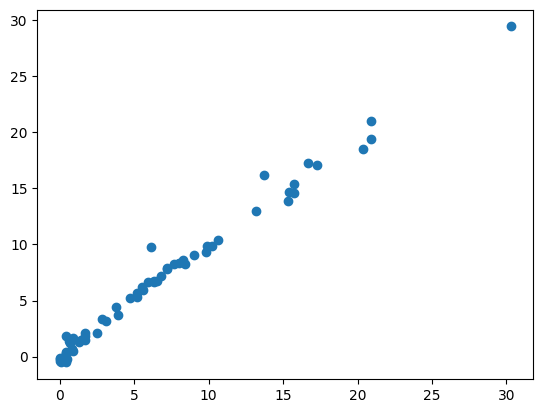

In [36]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv = 5)
ridgecv.fit(X_train_scaled,y_train)
y_pred = ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
score = r2_score(y_test,y_pred)
print('R2 Score:',score)
plt.show()

## Cross Validation ElasticNet

Mean Absolute Error: 0.6575946731430898
R2 Score: 0.9814217587854941


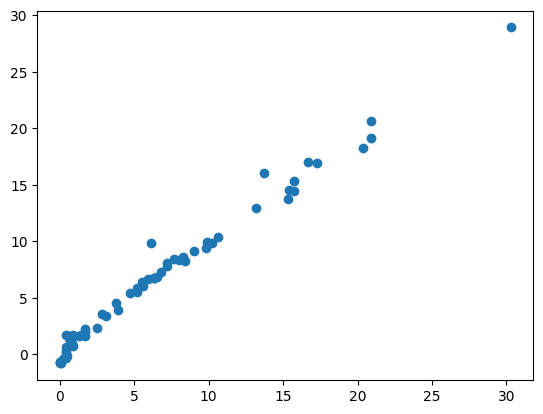

In [37]:
from sklearn.linear_model import ElasticNetCV
elasticnetcv = ElasticNetCV(cv = 5)
elasticnetcv.fit(X_train_scaled,y_train)
y_pred = elasticnetcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
score = r2_score(y_test,y_pred)
print('R2 Score:',score)
plt.show()

In [38]:
## Pickle the Machine Learning Model and the preprocessing model


In [39]:
scaler

StandardScaler()

In [40]:
ridge

Ridge()

In [43]:
import pickle 

pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))